In [16]:
from google.colab import files
uploaded = files.upload()

Saving heart_pca.csv to heart_pca (1).csv


In [18]:
import pandas as pd
feature_df = pd.read_csv("heart_pca.csv")
feature_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,num
0,1.056886,0.142561,-2.600496,1.342875,0.050053,-0.304071,0
1,-1.326260,1.587145,0.731607,0.421820,0.704721,0.185356,2
2,2.536460,1.117879,0.113120,0.076922,0.263847,0.219620,1
3,-1.590258,-0.653678,0.456804,1.536742,0.368943,-0.776991,0
4,-2.009211,0.566347,-1.179671,-0.391098,-0.499298,0.308367,0


In [20]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
# Train a simple XGboost
X = feature_df.drop(columns=['num'])
y= feature_df['num']

In [21]:
# Train a simple XGBoost model
model = xgb.XGBClassifier(eval_metric="logloss", random_state=42) # we put the metric ,and the random state only
model.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

<Figure size 1000x900 with 0 Axes>

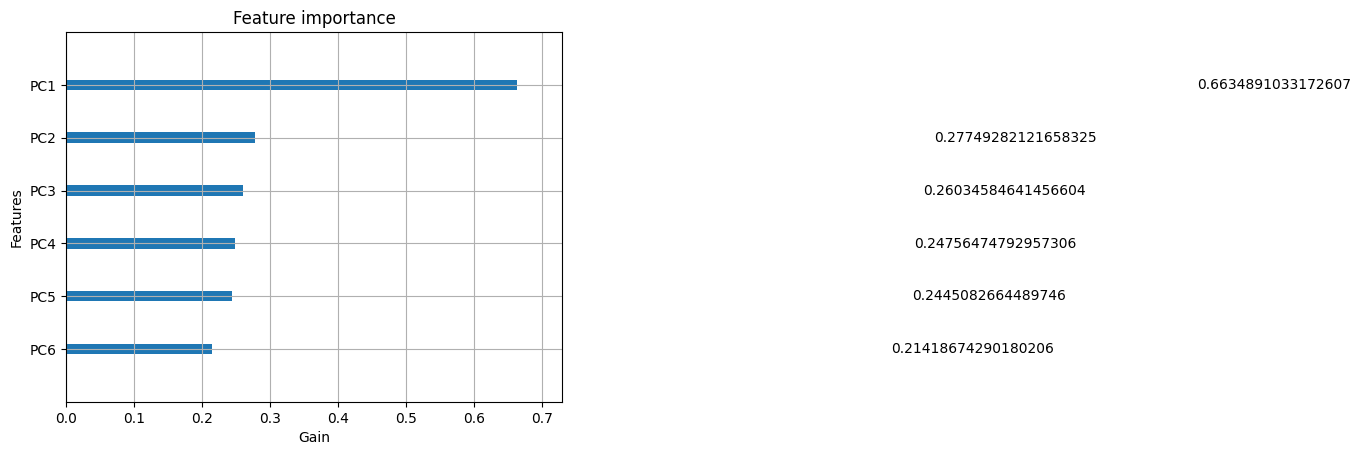

In [22]:
plt.figure(figsize=(10,9))
plot_importance(model, importance_type='gain', xlabel='Gain', ylabel='Features')
plt.show()

In [23]:
# Get importance values as a DataFrame
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importance_df)

  Feature  Importance
0     PC1    0.347816
1     PC2    0.145468
2     PC3    0.136479
3     PC4    0.129779
4     PC5    0.128177
5     PC6    0.112281


In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000,solver='liblinear')
model_lr

LogisticRegression(max_iter=1000, solver='liblinear')

In [26]:
rfe = RFE(model_lr, n_features_to_select=5)
rfe.fit(X,y)

RFE(estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
    n_features_to_select=5)

In [29]:
# Collect results into a DataFrame
rfe_results = pd.DataFrame({
    "Feature": X.columns,
    "Selected": rfe.support_,
    "Ranking": rfe.ranking_
}).sort_values(by="Ranking")
rfe_results

,Feature,Selected,Ranking
0,PC1,True,1
1,PC2,True,1
2,PC3,True,1
3,PC4,True,1
4,PC5,True,1
5,PC6,False,2


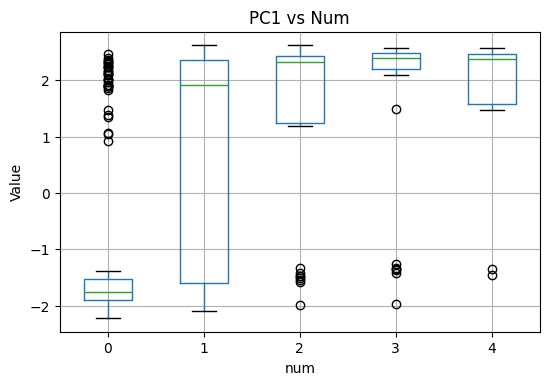

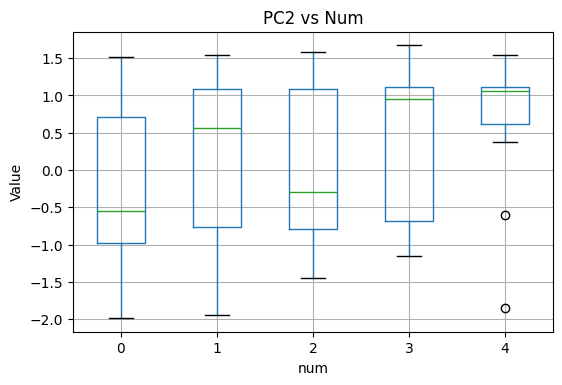

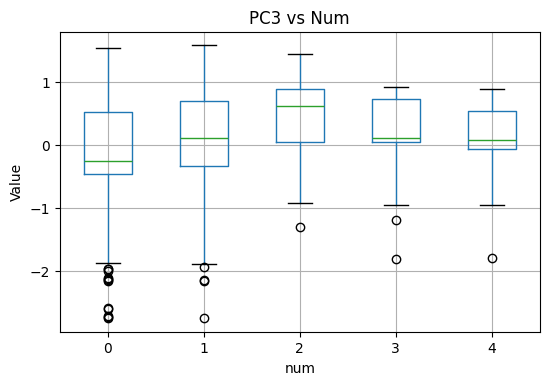

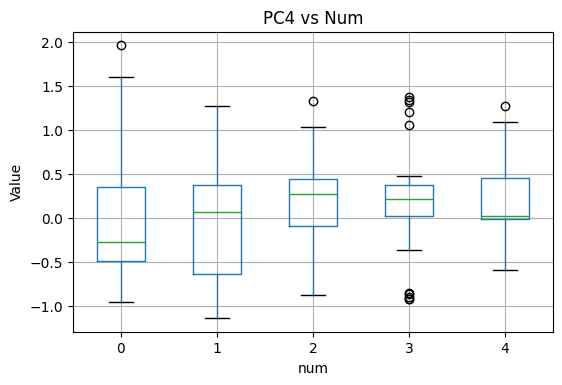

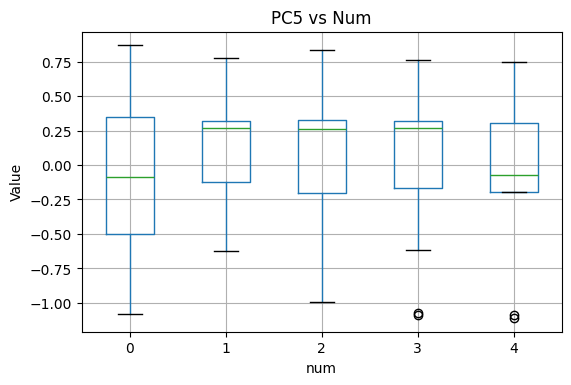

In [37]:
for col in ["PC1", "PC2", "PC3", "PC4", "PC5"]:
    feature_df.boxplot(column=col, by="num", figsize=(6,4))
    plt.title(f"{col} vs Num")
    plt.suptitle("")
    plt.ylabel("Value")
    plt.show()

In [41]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi_scores, p_values = chi2(X_scaled, y)

chi2_results = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi_scores,
    "p-value": p_values
}).sort_values(by="Chi2 Score", ascending=False)
print("Chi-Square Test Results:")
print(chi2_results)

Chi-Square Test Results:
  Feature  Chi2 Score       p-value
0     PC1   37.646952  1.325098e-07
1     PC2    3.115469  5.386913e-01
3     PC4    1.076056  8.980523e-01
2     PC3    1.004666  9.090877e-01
4     PC5    0.726723  9.479931e-01
5     PC6    0.290301  9.904317e-01


In [38]:
selected_features=["PC1","PC2","PC3","PC4","PC5"]
new_df_final = feature_df[selected_features+["num"]]
new_df_final

,PC1,PC2,PC3,PC4,PC5,num
0,1.056886,0.142561,-2.600496,1.342875,0.050053,0
1,-1.326260,1.587145,0.731607,0.421820,0.704721,2
2,2.536460,1.117879,0.113120,0.076922,0.263847,1
3,-1.590258,-0.653678,0.456804,1.536742,0.368943,0
4,-2.009211,0.566347,-1.179671,-0.391098,-0.499298,0
...,...,...,...,...,...,...
298,1.853549,-1.942554,-1.925421,0.483286,-0.024938,1
299,2.415159,-0.771217,0.710594,0.212605,-0.140310,2
300,2.465558,-0.728017,0.895206,0.289730,0.330547,3
301,-1.897136,0.715535,-1.155209,0.528155,-0.535736,1


In [43]:
new_df_final.to_csv("reduced_rfe.csv", index=False)
